In [322]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from perceptron import Perceptron


s = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# df = pd.read_csv(s, header=None, encoding="utf-8")
df = pd.read_csv("iris_data.csv")

print(df.tail())

     5.1  3.5  1.4  0.2     Iris-setosa
144  6.7  3.0  5.2  2.3  Iris-virginica
145  6.3  2.5  5.0  1.9  Iris-virginica
146  6.5  3.0  5.2  2.0  Iris-virginica
147  6.2  3.4  5.4  2.3  Iris-virginica
148  5.9  3.0  5.1  1.8  Iris-virginica


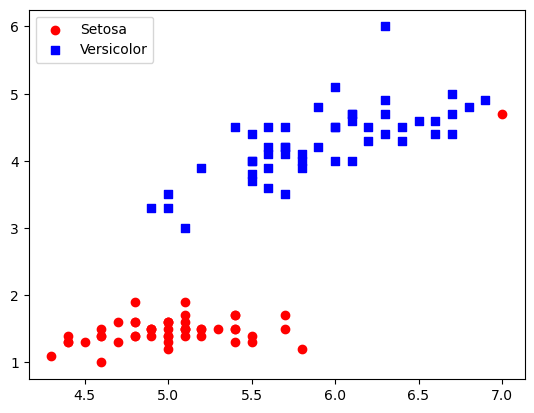

In [323]:
# select setosa and versicolor
y = df.iloc[0:100, 4].values
# iris-setosa turns to 0; all other flowers would be a 1. in this case, it's only one other flower - versicolor, hence the binary format.
y = np.where(y == "Iris-setosa", 0, 1)

# Select 0th and 2nd column; each example is a horizontal vector of two features.
X = df.iloc[0:100, [0, 2]].values

# plot data
plt.scatter(X[:50, 0], X[:50, 1], color="red", marker="o", label="Setosa")
plt.scatter(X[50:100, 0], X[50:100, 1], color="blue", marker="s", label="Versicolor")
plt.legend(loc="upper left")
plt.show()


shape of X given to the method:  (2,)
shape of the return value of the method:  ()
update, xi, b: -0.1 [4.9 1.4] -0.1
shape of X given to the method:  (2,)
shape of the return value of the method:  ()
shape of X given to the method:  (2,)
shape of the return value of the method:  ()
shape of X given to the method:  (2,)
shape of the return value of the method:  ()
shape of X given to the method:  (2,)
shape of the return value of the method:  ()
shape of X given to the method:  (2,)
shape of the return value of the method:  ()
shape of X given to the method:  (2,)
shape of the return value of the method:  ()
shape of X given to the method:  (2,)
shape of the return value of the method:  ()
shape of X given to the method:  (2,)
shape of the return value of the method:  ()
shape of X given to the method:  (2,)
shape of the return value of the method:  ()
shape of X given to the method:  (2,)
shape of the return value of the method:  ()
shape of X given to the method:  (2,)
shape of the r

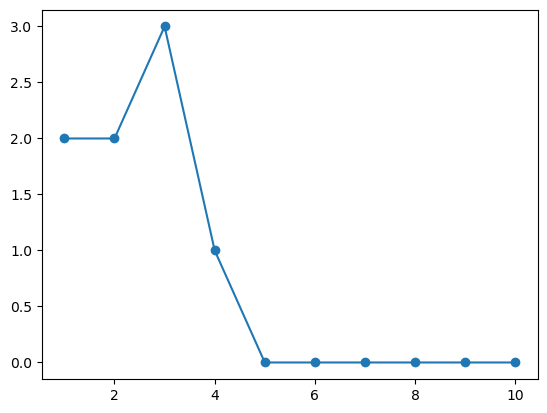

In [324]:
ppn = Perceptron(eta=0.1, n_iter=10, random_state=1)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker="o")


In [325]:
from matplotlib.colors import ListedColormap

#  In this code:

# - What is resolution? It's a step between each number.
    # Follow-up question: why do we make a meshgrid out of fake data? (x1_min to x1_max with resolution's value as steps)
    # Do we do it to visualize? Why can't we use samples from the actual dataset, then, and put them on the graph? Maybe to predict a decision boundary while not using the real dataset.


# - Why do we subtract 1 in x1_min, x1_max, x2_min...

# - What is lab? An array of 0s and 1s - predictions.
    # Why do we transpose the array passed into predict method?
    # Why do we reshape the lab?

# - What is ravel()?; why do we use it?

# What is contourf?

def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map 
    markers = ('o', 's', "^", "v", "<")
    colors = ("red", "blue", "lightgreen", "gray", "cyan")
    # colors = ("blue", "red", "lightgreen", "gray", "cyan")
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    # x1_min, x1_max = X[:, 0].min(), X[:, 0].max()    
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1    
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1   

    # x1_min, x1_max = X[:, 0].min(), X[:, 0].max() 
    # x2_min, x2_max = X[:, 1].min(), X[:, 1].max() 
    print(x1_min, x2_min)
    print(x1_max, x2_max)

    # how is resolution used here? To make steps between values to create fake data

    # What does np.meshgrid do exactly, what's it's return type, and what is it's return value typically used for?
    # How come that xx1 and xx2 turn to be 2D-arrays if all we pass into np.arange are min and max values, and the step between those values? Where does the second dimension come from?
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    
    # xx1, xx2 = np.meshgrid(np.arange(x2_min, x2_max, resolution),
    #                        np.arange(x1_min, x1_max, resolution))
    
    print(xx1)
    print(xx2)
    print(xx1.shape)
    print(xx2.shape)
    # print("xx1 type: ", type(xx1), " xx2 type:", type(xx2))

    # print("shape before transposing: ", np.array([xx1.ravel(), xx2.ravel()]).shape)
    # print("shape after transposing: ", np.array([xx1.ravel(), xx2.ravel()]).T.shape)

    # predict method here doesn't return a scalar as opposed to calling it within the Perceptron class
    # because in the class we call the predict on every example one-by-one, passing a 1D array of all the columns, or features, while here we pass a 2D array of all the examples.
    # ravel flattens the array to 1D
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    # print("lab shape: ", lab.shape, "lab", lab)

    lab = lab.reshape(xx1.shape)

    # print("xx1.shape", xx1.shape)
    # print("xx1.shape", xx2.shape)

    # print("lab shape: ", lab.shape, "lab", lab)


    # xx1 and xx2 are tightly put values all across the graph; they cover it entirely. 
    # xx1's and xx2's are also used to make predictions for every pair of their values.
    # Based off of the prediction, it chooses which color to fill in that particular gap (iterating over lab to see if it's 0 or 1? and accessing the cmap by index using that 0 or 1?)
    # There is no line that is formed for the decision boundary. In fact, it's just the areas that border each other, forming a line whose color is similar to black but it's just a blend of red and blue.
    # plt.scatter(xx1, xx2)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plt.xlim(x1_min, x1_max)
    # plt.ylim(x2_min, x2_max)

    print(xx2.max(), x2_max)

    # plot class examples

    # There are only two unique ys: 0 and 1. This block of code is to make it work for when there are more than two labels as well.
    # idx is there to use the color for a particular class.
    # cl is to access classes 0 and 1.

    # This code does NOT outline the decision boundary.
    for idx, cl in enumerate(np.unique(y)):
        # For every class (0 and 1 in this case), plot the points of that class. So, plot the points of class 0 first, then points of class 1.
        # The y axis here is in reality the values of x2 in the dataset; it's just the second column. This is why for the x we use the first column
        # and for y the second column. It makes it possible to visualize it on a 2D graph.
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha = 0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=f"Class {cl}",
                    edgecolor="black")

3.3 0.0
8.0 7.0
[[3.3  3.32 3.34 ... 7.94 7.96 7.98]
 [3.3  3.32 3.34 ... 7.94 7.96 7.98]
 [3.3  3.32 3.34 ... 7.94 7.96 7.98]
 ...
 [3.3  3.32 3.34 ... 7.94 7.96 7.98]
 [3.3  3.32 3.34 ... 7.94 7.96 7.98]
 [3.3  3.32 3.34 ... 7.94 7.96 7.98]]
[[0.   0.   0.   ... 0.   0.   0.  ]
 [0.02 0.02 0.02 ... 0.02 0.02 0.02]
 [0.04 0.04 0.04 ... 0.04 0.04 0.04]
 ...
 [6.94 6.94 6.94 ... 6.94 6.94 6.94]
 [6.96 6.96 6.96 ... 6.96 6.96 6.96]
 [6.98 6.98 6.98 ... 6.98 6.98 6.98]]
(350, 235)
(350, 235)
shape of X given to the method:  (82250, 2)
shape of the return value of the method:  (82250,)
6.98 7.0


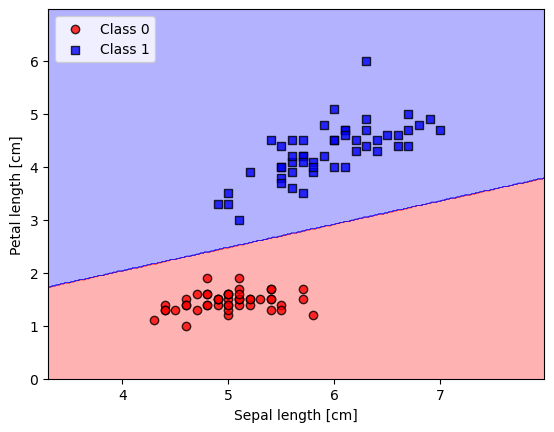

In [ ]:
# doesn't work when the resolution is too high
plot_decision_regions(X, y, classifier=ppn, resolution=0.02)
# plot_decision_regions(X, y, classifier=ppn, resolution=4.7)
plt.xlabel("Sepal length [cm]")
plt.ylabel("Petal length [cm]")
plt.legend(loc="upper left")
plt.show()


# 1. What do you mean by "query the classifier over a dense grid?" You mean points over the entire grid? Why? How does it work?
# You said that using only the real data points would give me scattered classifications and no continuous boundary. Why?
# Then, as a test, I tried increasing the resolution. As I went on, the decision boundary took a zig-zaggy form, and then there were even multiple decision boundaries.

# 2. What causes the outlying points to be cut off the graph without the padding? Is it the difference in values between x and y for classes 0 and 1? Or something else?

# 3. Why does np.array([xx1.ravel(), xx2.ravel()]) have the shape of (2, N) in the first place? Do the first, outer square brackets represent the rows, and the second, inner square brackets represent the columns? If so, how would it change in 3D? What brackets would refer to what axis?


# 4. How come that xx1 and xx2 turn to be 2D-arrays if all we pass into np.arange are min and max values, and the step between those values? Where does the second dimension come from?
    # The 2-dimensionality comes from combining every value of xx1 with every value of xx2. Or rather they will be that way for when you pass these arrays onto the graph.
    # assuming n is the size of x, and k the size of y
    # xx1 and xx2 are arrays of shape (n, k)
    # where every row of xx1 is x
    # while every row of y is i-th element of y repeated n times


# 5. How does ravel() flatten the array to 1D exactly? Let's say the 2D array has 2 rows and 4 columns, does it mean that there are going 8 rows in 1D array?
    # Think of ravel() like unrolling a matrix left to right, top to bottom

# 6. I tried changing xx1 and xx2 around so that xx1 is y and xx2 is x, but the graph was really different and not comprehensible. Why?



# Answers

# If the classifier is not very accurate or overfits, small decision noise leads to tiny regions flipping class labels, which look like zig-zags.
# It’s not just lack of data — it’s also how sensitive the model is to small perturbations in the input.
# These zig-zags are real predictions from the classifier — they were just invisible at lower resolutions.

# My own answer to zig-zaginess: the more the value of the resolution, the rarer the update; the rarer the update, the more abrupt is the change.

[[1 2 3]
 [1 2 3]
 [1 2 3]
 [1 2 3]]
[[4 4 4]
 [5 5 5]
 [6 6 6]
 [7 7 7]]


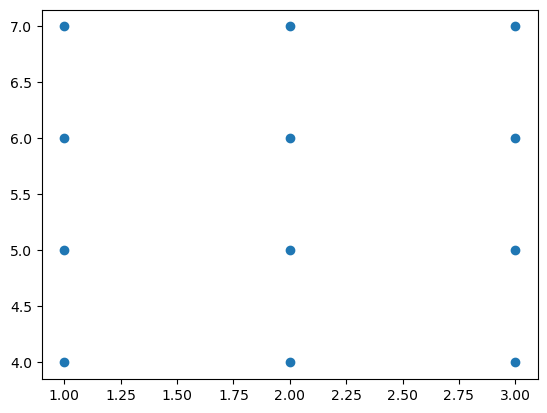

In [327]:
x = [1, 2, 3]
y = [4, 5, 6, 7]


# assuming n is the size of x, and k the size of y
# xx1 and xx2 are arrays of shape (n, k)
# where every row of xx1 is x
# while every row of y is i-th element of y repeated n times

# It's just math. x is stored horizontally and y is stored vertically.
xx1, xx2 = np.meshgrid(x, y)

# print(xx1, xx2)
print(xx1)
print(xx2)
plt.scatter(xx1, xx2)
# plt.plot(xx1, xx2, linestyle="")

In [ ]:
xx1, xx2 = np.meshgrid(np.arange(0, 4, 1), np.arange(0, 5, 1))

print(xx1)
print(xx2)

[[0 1 2 3]
 [0 1 2 3]
 [0 1 2 3]
 [0 1 2 3]
 [0 1 2 3]]
[[0 0 0 0]
 [1 1 1 1]
 [2 2 2 2]
 [3 3 3 3]
 [4 4 4 4]]


In [331]:
xx1, xx2 = np.meshgrid(np.arange(0, 5, 1), np.arange(0, 4, 1))

print(xx1)
print(xx2)

[[0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]]
[[0 0 0 0 0]
 [1 1 1 1 1]
 [2 2 2 2 2]
 [3 3 3 3 3]]


[[0 1 2 3]
 [0 1 2 3]
 [0 1 2 3]
 [0 1 2 3]
 [0 1 2 3]]
[[0 0 0 0]
 [1 1 1 1]
 [2 2 2 2]
 [3 3 3 3]
 [4 4 4 4]]
[1 2 3 4 5]
[[1]
 [2]
 [3]
 [4]
 [5]]
[[ 1  2  3  4  5]
 [ 2  4  6  8 10]
 [ 3  6  9 12 15]
 [ 4  8 12 16 20]
 [ 5 10 15 20 25]]


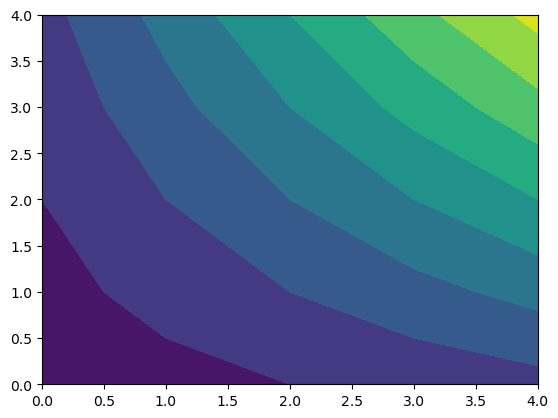

In [ ]:
# plt.contourf()

x = np.arange(1, 6)
y = x.reshape(-1, 1)
h = x * y

print(x)
print(y)
print(h)

cs = plt.contourf(h)
# cs = plt.contourf(h, levels=[10, 30, 50],
#     colors=['#808080', '#A0A0A0', '#C0C0C0'], extend='both')
# cs.cmap.set_over('red')
# cs.cmap.set_under('blue')
# cs.changed()

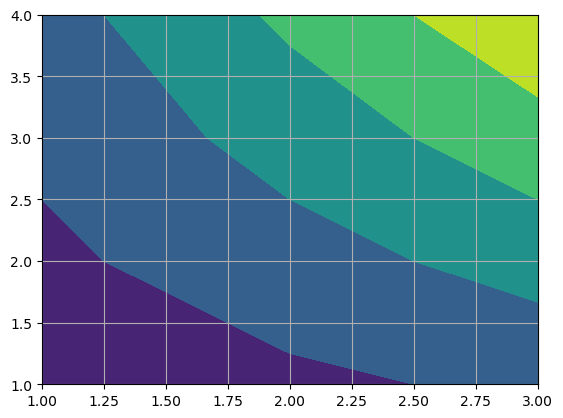

In [329]:
x = np.arange(1, 4)
y = np.arange(1, 5)
X, Y = np.meshgrid(x, y)
Z = X * Y

plt.contourf(X, Y, Z, levels=4, cmap='viridis')
plt.grid(True)
plt.show()